Ashley Brown 801055033 11/21/2022

Homework 5

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim

#configure data
data_set = '/content/drive/MyDrive/IntroToMachineLearning/Housing.csv'
dfread = pd.read_csv(data_set)
df = pd.DataFrame(dfread)
varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
housing = df[varlist]

###############################################

Problem 1 (20 pts):

In our temperature prediction example, let’s change our model to a non-linear system. Consider the following description for our model:

w2 * tu ** 2 + w1 * tu + b.

1.a Modify the training loop properly to accommodate this redefinition. 

1.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

1.c Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture. For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?

Definitions (most are from example):

In [2]:
#temperature example:
def model(tu, w1, w2, b):
  return w2 * tu**2 + w1 * tu + b

#functions for gradient descent: (from example, mostly)
def lossfunc(tp, tc):
  squareddiffs = (tp - tc)**2
  return squareddiffs.mean()

def dlossfunc(tp, tc):
  dsqdiffs = 2 * (tp - tc) / tp.size(0)
  return dsqdiffs

def dmodeldw1(tu, w1, w2, b):
  return tu

def dmodeldw2(tu, w1, w2, b):
  return tu**2

def dmodeldb(tu, w1, w2, b):
  return 1.0

def gradfunc(tu, tc, tp, w1, w2, b):
  dlossdtp = dlossfunc(tp, tc)
  dlossdw1 = dlossdtp * dmodeldw1(tu, w1, w2, b)
  dlossdw2 = dlossdtp * dmodeldw2(tu, w1, w2, b)
  dlossdb = dlossdtp * dmodeldb(tu, w1 , w2, b)
  return torch.stack([dlossdw1.sum(), dlossdw2.sum(), dlossdb.sum()])

def trainingloop(nepochs, learningrate, parameters, tu, tc):
    for epoch in range(1, nepochs + 1):

        w1, w2, b = parameters

        tp = model(tu, w1, w2, b)
        loss = lossfunc(tp, tc)
        grad = gradfunc(tu, tc, tp, w1, w2, b)
    
        parameters = parameters - learningrate * grad
        
        if epoch % 500 == 0: #report every 500
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return parameters

set up model and parameters/from temperature example:

In [3]:
#from temperature prediction example:
tc = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
tu = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
tc = torch.tensor(tc)
tu = torch.tensor(tu)

#loss of temperature example (verification):
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())
tp = model(tu, w1, w2, b)
loss = lossfunc(tp, tc)
print("default loss:",loss)

#normalize
tun = 0.1 * tu

default loss: tensor(11709471.)


Explore different learning rates:

In [4]:
#for .1:
trainingloop(
    nepochs = 5000,
    learningrate = 0.1,
    parameters = torch.tensor([1, 1, 0]),
    tu = tun,
    tc = tc
)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan])

In [5]:
#for .01:
trainingloop(
    nepochs = 5000,
    learningrate = 0.01,
    parameters = torch.tensor([1, 1, 0]),
    tu = tun,
    tc = tc
)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan])

In [6]:
#for .001:
trainingloop(
    nepochs = 5000,
    learningrate = 0.001,
    parameters = torch.tensor([1, 1, 0]),
    tu = tun,
    tc = tc
)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan])

In [7]:
#for .0001:
parameters = trainingloop(
    nepochs = 5000,
    learningrate = 0.0001,
    parameters = torch.tensor([1, 1, 0]),
    tu = tun,
    tc = tc
)
#since this is the only one with loss, this is the only one that converges

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


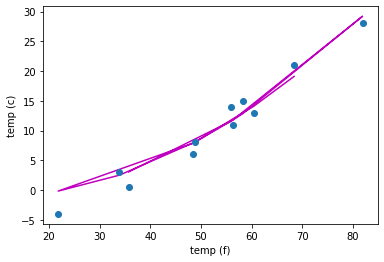

In [8]:
#plot: (for comparing to lecture)
tp = model(tun, *parameters)
fig = plt.figure()
plt.xlabel("temp (f)")
plt.ylabel("temp (c)")
plt.plot(tu.numpy(), tp.detach().numpy(), 'm')
plt.plot(tu.numpy(), tc.numpy(), 'o')

###############################################

Problem 2 (30 pts):

2.a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

For this, you need to use the housing dataset. For training and validation use 80% (training) and 20% (validation) split. Identify the best parameters for your linear regression model, based on the above input variables. In this case, you will have six parameters:

U=W5*X5 + W4*X4 + W3*X3 + W2*X2 + W1*X1 + B

2.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss and validation accuracy for every 500 epochs per each training. Pick the best linear model.

definitions:

In [9]:
#loss calculation
def lossfunc(tp, price):
    squareddiffs = (tp - price)**2
    return squareddiffs.mean()

#main training loop (from U equation, 2.a) (also modified coding examples)
def model(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b):
    return w5*parking + w4*stories + w3*bathrooms + w2*bedrooms + w1*area + b

def trainingloop(nepochs, learningrate, parameters, area, bedrooms, bathrooms, stories, parking, price):
    for epoch in range(1, nepochs + 1):
      
        if parameters.grad is not None:
            parameters.grad.zero_()
        
        tp = model(area, bedrooms, bathrooms, stories, parking, *parameters) 
        
        loss = lossfunc(tp, price)
        loss.backward()
        
        with torch.no_grad():
            parameters -= learningrate * parameters.grad

        if epoch % 500 == 0: #print every 500 as required
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return parameters

set up model and parameters:

In [10]:
#predict pricing and normalize variables (N means normalized)
area = torch.tensor(housing['area'])
areaN = area/max(housing['area'])
bedrooms = torch.tensor(housing['bedrooms'])
bedroomsN = bedrooms/max(housing['bedrooms'])
bathrooms = torch.tensor(housing['bathrooms'])
bathroomsN = bathrooms/max(housing['bathrooms'])
stories = torch.tensor(housing['stories'])
storiesN = stories/max(housing['stories'])
parking = torch.tensor(housing['parking'])
parkingN = parking/max(housing['parking'])
price = torch.tensor(housing['price'])

training and plot results:

Epoch 500, Loss 1562038501376.000000
Epoch 1000, Loss 1533011427328.000000
Epoch 1500, Loss 1531161870336.000000
Epoch 2000, Loss 1531023589376.000000
Epoch 2500, Loss 1531010482176.000000
Epoch 3000, Loss 1531008778240.000000
Epoch 3500, Loss 1531008516096.000000
Epoch 4000, Loss 1531008516096.000000
Epoch 4500, Loss 1531008516096.000000
Epoch 5000, Loss 1531008516096.000000


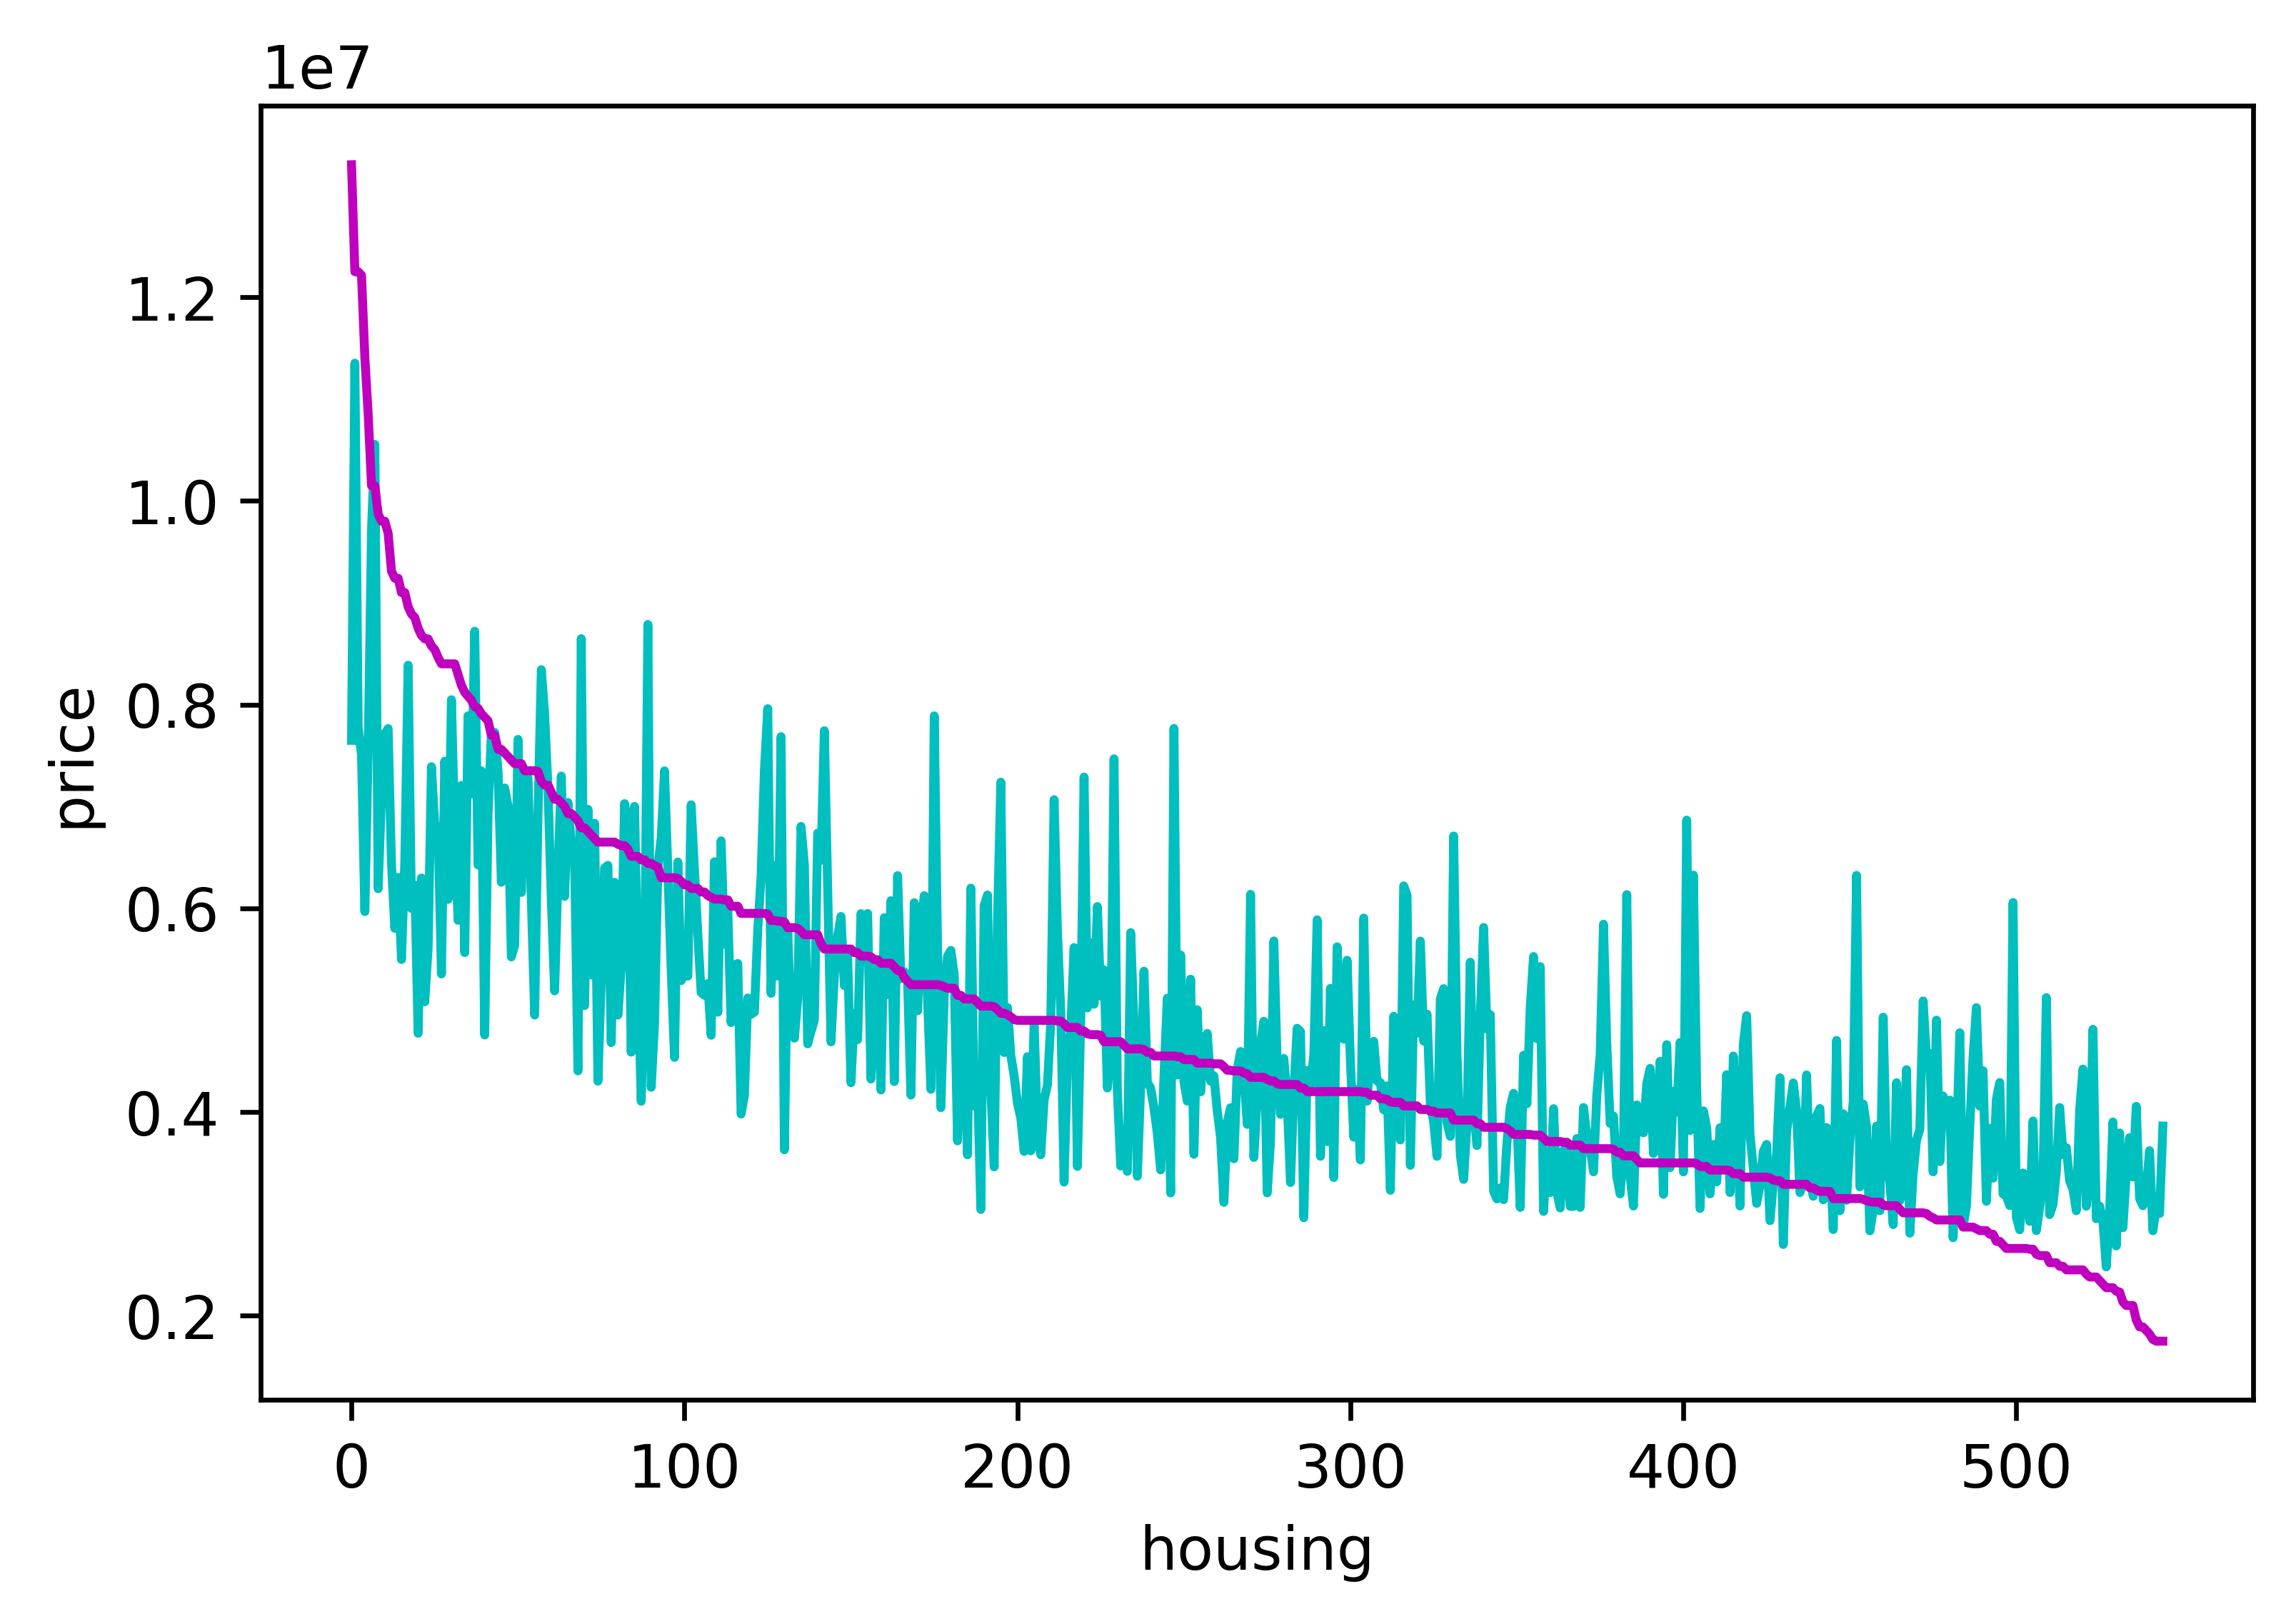

In [11]:
#do training loop
parameters = trainingloop(
    nepochs = 5000, 
    learningrate = 0.1, 
    parameters = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True),
    #requires grad required or it breaks
    area = areaN,
    bedrooms = bedroomsN,
    bathrooms = bathroomsN,
    stories = storiesN,
    parking = parkingN,
    price = price
)

#plot
tp = model(areaN, bedroomsN, bathroomsN, storiesN, parkingN, *parameters)
fig = plt.figure(dpi=600)
plt.xlabel("housing")
plt.ylabel("price")
plt.plot(tp.detach().numpy(), 'c')
plt.plot(price, 'm')

###############################################

Problem 3 (50 pts):

3.a Build a fully connected neural network for the housing dataset you did in previous problem. For training and validation use 80% (training) and 20% (validation) split. For this part, only use one hidden layer with 8 nodes. Train your network for 200 epochs. Report your training time, training loss, and evaluation accuracy after 200 epochs. Analyze your results in your report. Make sure to submit your code by providing the GitHub URL of your course repository for this course. (15pts)

3.b Extend your network with two more additional hidden layers, like the example we did in lecture. Train your network for 200 epochs. Report your training time, training loss, and evaluation accuracy after 200 epochs. Analyze your results in your report. Make sure to submit your code by providing the GitHub URL of your course repository for this course. Analyze your results in your report and compare your model size and accuracy over the baseline implementation in Problem1. a. Do you see any over-fitting? Make sure to submit your code by providing the GitHub URL of your course repository for this course. (25pts)

definitions:

In [12]:
#training loop
def trainingloop(nepochs, optimize, model, lossfunc, utrain, utest, ctrain, ctest):
    for epoch in range(1, nepochs + 1):
        ptrain = model(utrain)
        losstrain = lossfunc(ptrain, ctrain)
        
        ptest = model(utest)
        losstest = lossfunc(ptest, ctest)

        p1optimizer.zero_grad()
        losstrain.backward()
        p1optimizer.step()

        if epoch == 1 or epoch % 100 == 0:
            print(f"Epoch {epoch}, Training loss {losstrain.item():0.4f},"f" testing loss {losstest.item():.4f}")
            

set up model and parameters:

In [17]:
#predict pricing and normalize variables (N means normalized)
area = torch.tensor(housing['area'])
areaN = area/max(housing['area'])
bedrooms = torch.tensor(housing['bedrooms'])
bedroomsN = bedrooms/max(housing['bedrooms'])
bathrooms = torch.tensor(housing['bathrooms'])
bathroomsN = bathrooms/max(housing['bathrooms'])
stories = torch.tensor(housing['stories'])
storiesN = stories/max(housing['stories'])
parking = torch.tensor(housing['parking'])
parkingN = parking/max(housing['parking'])
price = torch.tensor(housing['price'])
priceN = price / max(housing['price'])

#train test split
split = np.random.rand(len(areaN)) <= 0.8
areatrain = areaN[split]
areatest = areaN[~split]
bedroomstrain = bedroomsN[split]
bedroomstest = bedroomsN[~split]
bathroomstrain = bathroomsN[split]
bathroomstest = bathroomsN[~split]
storiestrain = storiesN[split]
storiestest = storiesN[~split]
parkingtrain = parkingN[split]
parkingtest = parkingN[~split]
pricetrain = priceN[split]
pricetest = priceN[~split]

#turn into tensors
training = [areatrain, bedroomstrain, bathroomstrain, storiestrain, parkingtrain]
training = torch.stack(training)
training = np.transpose(training)
testing = [areatest, bedroomstest, bathroomstest, storiestest, parkingtest]
testing = torch.stack(testing)
testing = np.transpose(testing)


#model (part 1)
p1model = nn.Sequential(
          nn.Linear(5,8),
          nn.Tanh(),
          nn.Linear(8,16),
          nn.Tanh(),
          nn.Linear(16,1)
)

#model (part 2)
p2model = nn.Sequential(
                nn.Linear(5,8),
                nn.Tanh(),
                nn.Linear(8,16),
                nn.Tanh(),
                nn.Linear(16, 32),
                nn.Tanh(),
                nn.Linear(32,64),
                nn.Tanh(),
                nn.Linear(64,1)
)

training:

In [19]:
#optimizer
optimizer = optim.SGD(p1model.parameters(), lr = .001)

#training loop
trainingloop(
    nepochs = 200,
    optimize = optimizer,
    model = p1model,
    lossfunc = nn.MSELoss(),
    utrain = training,
    utest = testing,
    ctrain = pricetrain,
    ctest = pricetest)

Epoch 1, Training loss 0.2458, testing loss 0.2164
Epoch 100, Training loss 0.2458, testing loss 0.2164
Epoch 200, Training loss 0.2458, testing loss 0.2164


In [20]:
#optimizer
optimizer = optim.SGD(p2model.parameters(), lr = .001)

#training loop
trainingloop(
    nepochs = 200,
    optimize = optimizer,
    model = p2model,
    lossfunc = nn.MSELoss(),
    utrain = training,
    utest = testing,
    ctrain = pricetrain,
    ctest = pricetest)

Epoch 1, Training loss 0.1471, testing loss 0.1227
Epoch 100, Training loss 0.1471, testing loss 0.1227
Epoch 200, Training loss 0.1471, testing loss 0.1227
